## GETTING DATASET

In [1]:
import d2l
from mxnet import gluon
import sys

d2l.use_svg_display()

In [3]:
mnist_train = gluon.data.vision.FashionMNIST(train=True)
mnist_test = gluon.data.vision.FashionMNIST(train=False)

In [4]:
len(mnist_train), len(mnist_test)

(60000, 10000)

In [6]:
def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

In [11]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    
    for i, (ax,img) in enumerate(zip(axes, imgs)):
        ax.imshow(img.asnumpy())
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        
        if titles:
            ax.set_title(titles[i])
    return axes

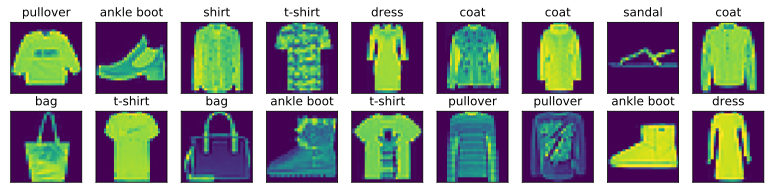

In [12]:
X, y = mnist_train[:18]
show_images(X.squeeze(axis=-1), 2, 9, titles= get_fashion_mnist_labels(y));

## READING MINIBATCH

In [17]:
def get_dataloader_workers(num_workers = 4):
    if sys.platform.startswith('win'):
        return 0 
    else:
        return num_workers

In [18]:
batch_size = 256

transformer = gluon.data.vision.transforms.ToTensor()

train_iter = gluon.data.DataLoader(mnist_train.transform_first(transformer),
                                  batch_size, shuffle=True, num_workers=get_dataloader_workers())

In [19]:
timer = d2l.Timer()

for X, y in train_iter:
    continue
'%.2f sec' % timer.stop()

'4.55 sec'

## PUTTING ALL TOGETHER

In [20]:
def load_data_fashion_mnist(batch_size, resize=None):
    dataset = gluon.data.vision
    trans = [dataset.transforms.Resize(resize)] if resize else []
    trans.append(dataset.transforms.ToTensor())
    trans = dataset.transforms.Compose(trans)
    
    mnist_train = dataset.FashionMNIST(train=True).transform_first(trans)
    mnist_test = dataset.FashionMNIST(train=False).transform_first(trans)
    
    return (gluon.data.DataLoader(mnist_train, batch_size, shuffle=True, 
                                 num_workers=get_dataloader_workers()),
           gluon.data.DataLoader(mnist_test, batch_size, shuffle=False, 
                                 num_workers=get_dataloader_workers()))

In [21]:
train_iter, test_iter = load_data_fashion_mnist(32, (64,64))

for X, y in train_iter:
    print(X.shape)
    break

(32, 1, 64, 64)
